In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
from sklearn import datasets
 

In [ ]:
df = pd.read_csv("car_data_ML.csv", header = None)
df.shape

(1728, 7)

In [ ]:
df.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [ ]:
if df.isna() is True:
  print('yes')

In [ ]:
#df.tail()

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
column_names = ['buying' , 'maint' , 'doors' , 'persons' , 'lug_boot' , 'safety' , 'class']

In [ ]:
df = pd.read_csv("car_data_ML.csv", names = column_names)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df_CategoricalNB = pd.read_csv("car_data_ML.csv", names = column_names)

In [ ]:
df_CategoricalNB.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
df_CategoricalNB.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,big,high,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
df_CategoricalNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df_CategoricalNB.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [ ]:
df_CategoricalNB.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
feature_cols_01 = df_CategoricalNB.columns.to_list()
feature_cols_01

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
feature_cols_01.remove('class')
feature_cols_01

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
encoder = OrdinalEncoder()
df_encoded = encoder.fit_transform(df_CategoricalNB[feature_cols_01])
df_CategoricalNB_encoded = pd.DataFrame(df_CategoricalNB, columns=feature_cols_01)
df_encoded


array([[3., 3., 0., 0., 2., 1.],
       [3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

In [ ]:
encoder = LabelEncoder()
class_encoded = encoder.fit_transform(df_CategoricalNB['class'])
df_CategoricalNB_encoded['class'] = class_encoded
encoder.inverse_transform(class_encoded)

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'good', 'vgood'],
      dtype=object)

In [ ]:
df_CategoricalNB_encoded.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,2
1,vhigh,vhigh,2,2,small,med,2
2,vhigh,vhigh,2,2,small,high,2
3,vhigh,vhigh,2,2,med,low,2
4,vhigh,vhigh,2,2,med,med,2


In [ ]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_CategoricalNB_encoded.values, i) for i in range(len(feature_cols_01))]
vif["Features"] = feature_cols_01
vif

TypeError: ignored

In [ ]:
###############
#CategoricalNB
###############

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_CategoricalNB_encoded.drop('class', axis=1), df_CategoricalNB_encoded['class'], test_size=0.40)

In [ ]:
cate_nb = CategoricalNB()
cate_nb.fit(x_train, y_train)

In [ ]:
y_pred_cnb = cate_nb.predict(x_test)
y_prob_pred_cnb = cate_nb.predict_proba(x_test)
count_misclassified = (y_test != y_pred_cnb).sum()

print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_cnb)
print(f"Categorical NB Accuracy: {accuracy * 100}")

In [ ]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_cnb)

In [ ]:
#dsggdgd

In [ ]:
#############
#GaussianNB
#############

In [ ]:
gaus_nb = GaussianNB()
gaus_nb.fit(x_train, y_train)

In [ ]:
y_pred_gnb = gaus_nb.predict(x_test)
y_prob_pred_gnb = gaus_nb.predict_proba(x_test)
count_misclassified = (y_test != y_pred_gnb).sum()


print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian NB Accuracy: {accuracy * 100}")

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gnb)

In [ ]:
#very low for Gaussian

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
df['class'].value_counts()

In [ ]:
 df['class'].value_counts().plot(kind='bar', color='lightcoral', hatch = '/', edgecolor = 'black')

In [ ]:
df.value_counts()

In [ ]:
 #df.value_counts().plot(kind='bar')

In [ ]:
'''
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
for i in range(len(patterns)):
    df.bar(i, 3, color='red', edgecolor='black', hatch=patterns[i])
'''

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
#label encoding
#Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

buying_label = {ni:n for n, ni in enumerate(set(df['buying']))}
maint_label = {ni:n for n, ni in enumerate(set(df['maint']))}
doors_label = {ni:n for n, ni in enumerate(set(df['doors']))}
persons_label = {ni:n for n, ni in enumerate(set(df['persons']))}
lug_boot_label = {ni:n for n, ni in enumerate(set(df['lug_boot']))}
safety_label = {ni:n for n, ni in enumerate(set(df['safety']))}
class_label = {ni:n for n, ni in enumerate(set(df['class']))}

In [ ]:
maint_label

In [ ]:
df['doors'].unique()

In [ ]:
df_02 = df

In [ ]:
df_02.head()

In [ ]:
#df_02.columns()
df_02.columns

In [ ]:
'''
#df_02[''] = df_02[''].map()
buying_label = {ni:n for n, ni in enumerate(set(df['buying']))}
maint_label = {ni:n for n, ni in enumerate(set(df['maint']))}
doors_label = {ni:n for n, ni in enumerate(set(df['doors']))}
persons_label = {ni:n for n, ni in enumerate(set(df['persons']))}
lug_boot_label = {ni:n for n, ni in enumerate(set(df['lug_boot']))}
safety_label = {ni:n for n, ni in enumerate(set(df['safety']))}
class_label = {ni:n for n, ni in enumerate(set(df['class']))}
'''


In [ ]:
#Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

df_02['buying'] = df_02['buying'].map(buying_label)
df_02['maint'] = df_02['maint'].map(maint_label)
df_02['doors'] = df_02['doors'].map(doors_label)
df_02['persons'] = df_02['persons'].map(persons_label)
df_02['lug_boot'] = df_02['lug_boot'].map(lug_boot_label)
df_02['safety'] = df_02['safety'].map(safety_label)
df_02['class'] = df_02['class'].map(class_label)

In [ ]:
df_02.tail()

In [ ]:
#Sklearn label_Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()

In [ ]:
df_03 = df

In [ ]:
for i in df_03.columns:
  df_03[i] = label.fit_transform(df_03[i])

In [ ]:
df_03.head()

In [ ]:
df_03.dtypes

In [ ]:
df_03.describe()

In [ ]:
ylabel = df_03['class']
xfeatures = df_03[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]

In [ ]:
#df_03.columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xfeatures, ylabel, test_size=0.4)

In [ ]:
nb = MultinomialNB()
nb.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:

#acc
print("acc_score:", accuracy_score(y_test, nb.predict(x_test)))
nb_accuracy_score = (accuracy_score(y_test, nb.predict(x_test))) * 100
print(f"Naive Bayes Accuracy score = {nb_accuracy_score}")

In [ ]:
###########--------############
# Naive Bayes Confusion Matrix
###########--------############

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, nb.predict(x_test))

In [ ]:
###################
#ID3 algorithm Decision trees
# research
# chefboost??
# import chefbost as chef
print("acc_score: " , accuracy_score(y_test, nb.predict(x_test)))


!pip install Chefboost
import chefboost as chef

In [ ]:
column_names = ['buying' , 'maint' , 'doors' , 'persons' , 'lug_boot' , 'safety' , 'class']
df_id3 = pd.read_csv('/content/car_data_ML.csv', header=None, names= column_names)

df_id3.head()

In [ ]:
#config = {'algorithm':'ID3'}
#model = chef.fit(df_id3,config)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
df_03 = df_id3
#feature_cols = ['']
df_id3.columns

In [ ]:
'''
feature_cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
target_cols = ['class']
x = df_id3[feature_cols]
y = df_id3[target_cols]
'''

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

In [ ]:
'''
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
'''

In [ ]:
########################
#Decision tree take 2:
########################

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df_03.head()

In [ ]:
#feature_cols

In [ ]:
x = df_03.drop(['class'], axis = 1)
y = df_03['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [ ]:
x_train.shape, x_test.shape

In [ ]:
#import category_encoders as ce

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()

In [ ]:
df.head()

In [ ]:
df_decision_trees = df

In [ ]:

for i in df_decision_trees.columns:
  df_decision_trees[i] = label.fit_transform(df_decision_trees[i])


In [ ]:
df_decision_trees

In [ ]:
'''
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0) 
clf_gini.fit(x_train, y_train) 
y_pred_gini = clf_gini.predict(x_test)
'''

In [ ]:
####################
#original dataset 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("car_data_ML.csv", header = None)
df.shape

(1728, 7)

In [ ]:
df.columns = column_names

In [ ]:
x = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
x_train.shape, x_test.shape

((1036, 6), (692, 6))

In [ ]:
!pip install category-encoders

In [ ]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)
#x_train.head()

#x_test.head()

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3) 
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test) 

In [ ]:
accuracy_score_decision_tree = [(accuracy_score(y_test, y_pred_gini))*100]

print(f'Accuracy score : {accuracy_score_decision_tree}')

Accuracy score : [79.04624277456648]


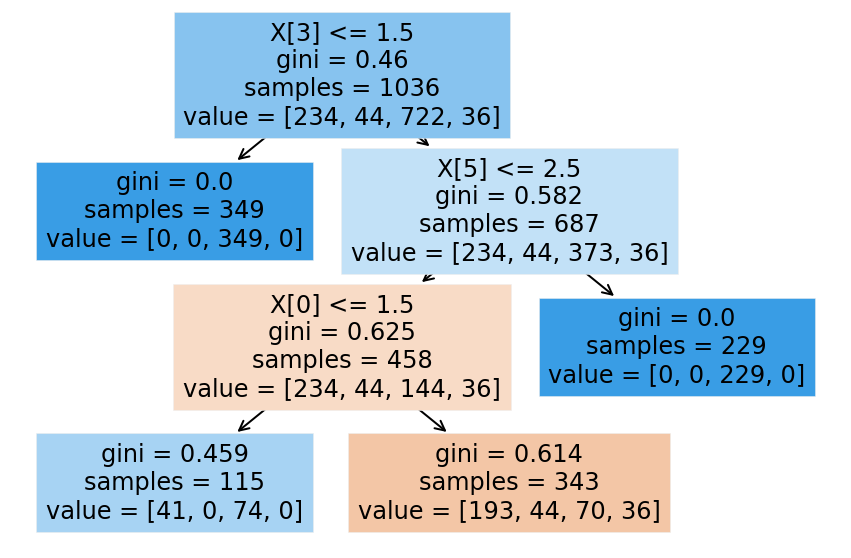

In [ ]:
plt.figure(figsize=(15,10), facecolor = None)
from sklearn import tree
tree_diagram = tree.plot_tree(clf_gini.fit(x_train, y_train), filled= True)
for t in tree_diagram:
    arrow = t.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)


In [ ]:
########-----------------#########
# Confusion Matrix Decision Tree
########-----------------#########

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gini)

In [ ]:
'''
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=x_train.columns,class_names=y_train, filled=True, rounded=True)
graph = graphviz.Source(dot_data) 
graph
'''

In [ ]:
##################
# Random Forest.
##################

In [ ]:
df = pd.read_csv('car_data_ML.csv', header = None)
df.shape


In [ ]:
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.columns = column_names
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
df.info()


In [ ]:
from plotly.offline import init_notebook_mode
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [ ]:
df.head()

In [ ]:
sns.countplot(x = 'buying' , hue='class', data = df)

In [ ]:
df.head()

In [ ]:
x = df.drop("class", axis = 1)
y = df['class']

In [ ]:
y.values

In [ ]:
x = pd.get_dummies(x)
x

In [ ]:
'''
y = y.replace({'unacc' : 0, 'acc' : 1, 'good' : 2, 'vgood' : 3})



y = y.replace(
    {
        "unacc" : 0,
        "acc" : 1,
        "good" : 2,
        "vgood" : 3
    }
)
y.value_counts()
'''

In [ ]:
y.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10)

In [ ]:
!pip install catboost
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
model = ensemble.RandomForestClassifier()

In [ ]:
'''
row_no = 0

for classifier in model:
  classifier.fit(x_train, y_train)

  ypred = classifier.predict(x_test)
'''

In [ ]:
from sklearn.metrics import confusion_matrix



---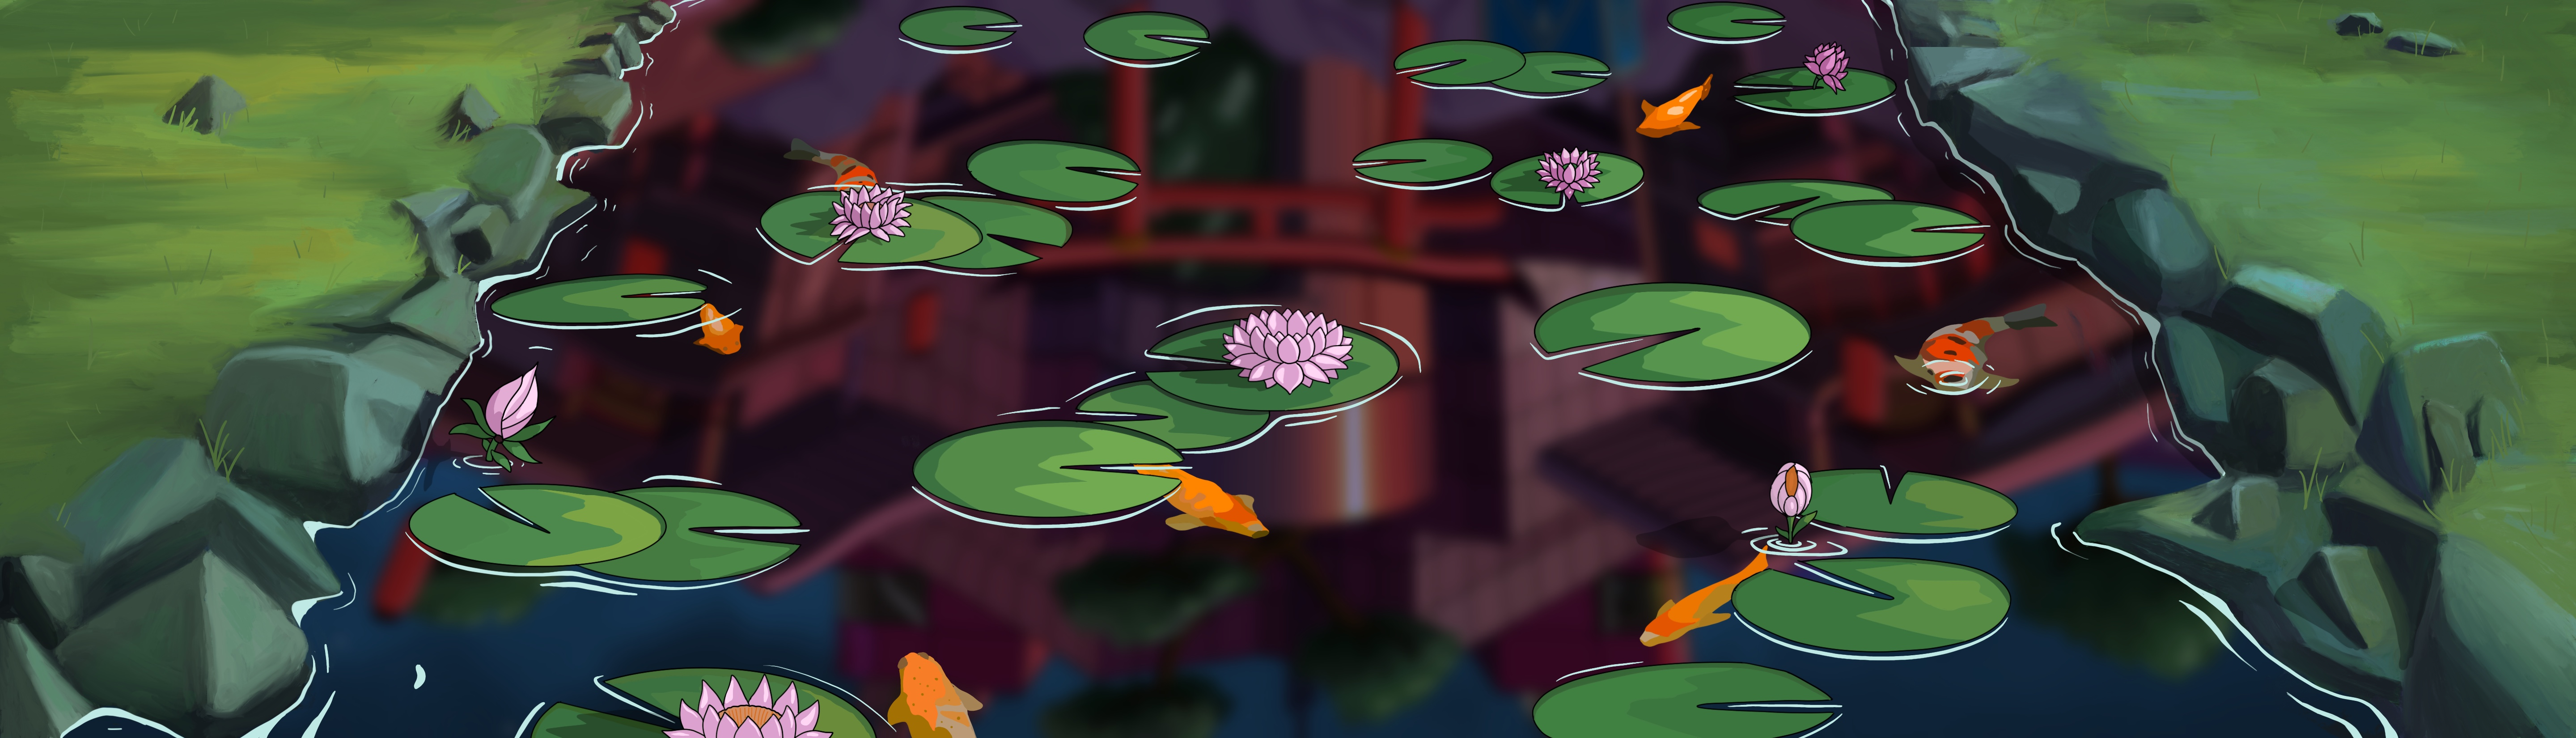




In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

# bu default 100 n_estimators
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#classifier.fit(x_train, y_train)
#y_pred = classifier.predict(x_test)

In [ ]:
#######################
#Random Forest Accuracy
#######################

In [ ]:
model.score(x_test,y_test)
accuracy_score_Random_forest = (model.score(x_test,y_test) * 100)

print(f"Random forest accuracy:  {accuracy_score_Random_forest}")

In [ ]:
from sklearn.metrics import  confusion_matrix

confusion_matrix_Random_Forest = confusion_matrix(x_test,y_test)


In [ ]:
y_type

In [ ]:
'''
df = pd.get_dummies(df)
df.head()
'''

In [ ]:
'''
labels = df['class']

#df = df.drop('class', axis=1)

feature_list = list(df.columns)
'''

In [ ]:
'''
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(df,
                                                                            labels,
                                                                            test_size = 0.4,
                                                                            random_state = 42)

                                                                            '''

In [ ]:
########################
#Random Forest Take 2
########################

In [ ]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv("car_data_ML.csv", header = None)
df.describe()

In [ ]:
column_names

In [ ]:
columns = ["Buy_price","mcost","ndoors","nop","lug_boot","safety","decision"]
df.columns = columns

In [ ]:
df.head()

X_list=["Buy_price","mcost","ndoors","nop","lug_boot","safety"]

X=df[X_list]
y=df.decision
y.value_counts()

In [ ]:
df.shape

In [ ]:
X

In [ ]:
pip install --upgrade category_encoders

In [ ]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=["Buy_price","mcost","ndoors","nop","lug_boot","safety"])
X= encoder.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn import tree,svm,naive_bayes,neighbors,ensemble
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf_gs = GridSearchCV(ensemble.RandomForestClassifier(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
rf_gs.fit(X_train, y_train)
print(" ####### RANDOM FOREST #######")
print(rf_gs.best_params_)

In [ ]:
y_pred = rf_gs.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in decision tree is : {}".format(cas))
print("Confusion matrix for decision tree is : ")
print(confusion_matrix(y_pred,y_train))
'''
compiler_compare.loc[row_num, 'Name'] = 'Random Forest'
compiler_compare.loc[row_num, 'Train Accuracy Score'] = cas*100
'''

In [ ]:
#######################
#Randon Forest Take 3
#######################

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv("car_data_ML.csv", header = None)
df.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,big,high,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.60, random_state = 1000)

In [ ]:
X_train.shape, X_test.shape

((1036, 6), (692, 6))

In [ ]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
628,high,high,5more,2,big,med
1099,med,med,2,more,small,med
454,high,vhigh,2,more,med,med
528,high,vhigh,5more,4,big,low
1564,low,med,3,more,big,med


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1378,3,3,1,1,2,1
424,4,4,1,2,2,1
664,1,2,2,3,1,1
411,4,4,1,1,1,2
1627,3,4,2,1,1,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1000)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score_Random_forest_3 = (accuracy_score(y_test, y_pred)) * 100
accuracy_score_Random_forest_3

93.20809248554913

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)


print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9321


In [ ]:
####################################
#Confusion Matrix for Rnadom Forest
####################################

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[126   1  28   3]
 [  6  21   0   1]
 [  6   1 474   0]
 [  1   0   0  24]]


In [ ]:
test_size

NameError: ignored

In [ ]:
#Gaussian NB
import numpy as np
from statistics import  mean
from matplotlib import pyplot as pl

a=np.array([65.173,63.35,64.35,68.208])
b=np.std(a)  
b
#mean(a)

1.8148038978082448

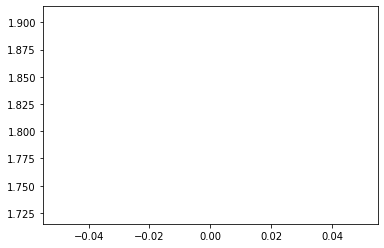

In [ ]:
pl.plot(b)

In [ ]:
#Multinomial NB

a=np.array([71.387, 70.370,72.916,72.832])
b=np.std(a)  
b

1.0609774679511303

In [ ]:
# categorical NB

a=np.array([85.260,87.5,84.416,82.080])
b=np.std(a)  
b

1.9395019979365848

In [ ]:
#Decision Tree ID3

a=np.array([78.612,79.745,80.092,71.098])
b=np.std(a)  
b


3.671829746529651

In [ ]:
#Random Forest

a=np.array([93.208, 93.287, 95.370, 98.265])
b=np.std(a)  
b


2.057822453468714